Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












In [1]:
## Imports.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
plt.style.use('fast') 

In [3]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [6]:
#Reading in the titanic dataset
url='https://raw.githubusercontent.com/austinlasseter/pandas_visualization/master/data/titanic.csv'
df=pd.read_csv(url)
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,Southampton
1,1,1,female,38.0,71.2833,Cherbourg
2,1,3,female,26.0,7.9250,Southampton
3,1,1,female,35.0,53.1000,Southampton
4,0,3,male,35.0,8.0500,Southampton


In [7]:
# cabin class is a categorical variable
# it can be displayed using either number or string values.
df['cabin_class'] = df['Pclass'].map({1:'first', 2: 'second', 3:'third'})
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,cabin_class
0,0,3,male,22.0,7.2500,Southampton,third
1,1,1,female,38.0,71.2833,Cherbourg,first
2,1,3,female,26.0,7.9250,Southampton,third
3,1,1,female,35.0,53.1000,Southampton,first
4,0,3,male,35.0,8.0500,Southampton,third


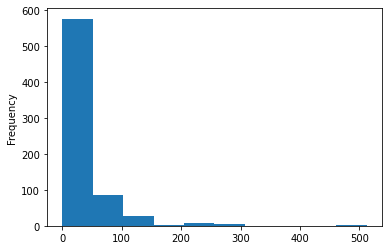

In [10]:
#Fare an continuous variable
df['Fare'].plot(kind='hist');

In [11]:
# A continuous variable can be converted to a categorical var using binning.
farebins=[0,8,15,33,512]
farelabels=['low', 'medium', 'high','vhigh']
df['fare_groups']= pd.cut(df['Fare'], bins=farebins, labels=farelabels)
myresults = df['fare_groups'].value_counts().sort_index()
myresults

low       154
medium    189
high      185
vhigh     174
Name: fare_groups, dtype: int64

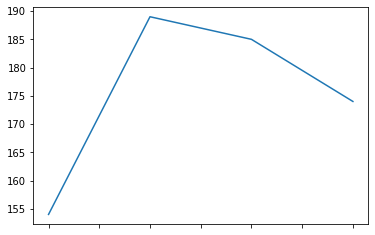

In [12]:
# sometimes it's important to specify the range of your y-axis to get more accurate results. 'lim'='limits'
myresults.plot();
# myresults.plot(ylim=(0,200));

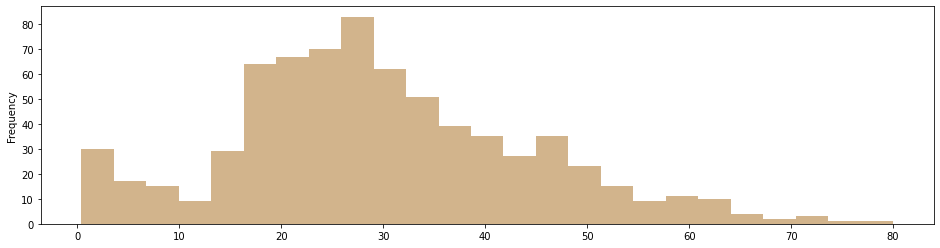

In [13]:
# Histogram
df['Age'].plot(kind='hist', bins=25, figsize=(16,4), color='tan');

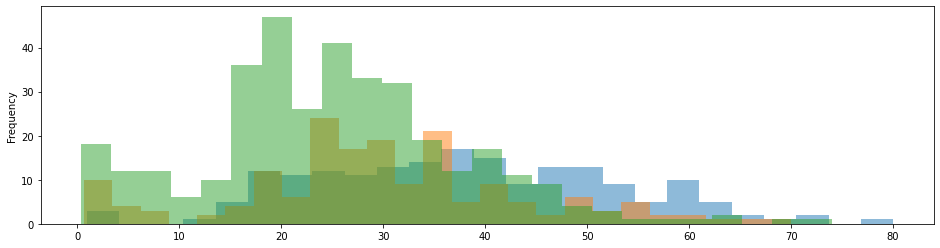

In [14]:
# Stacked Histogram of continuous variable, broken out by categorical variable
df[df['Pclass']==1]['Age'].plot(kind='hist', bins=25, figsize=(16,4), alpha=0.5)
df[df['Pclass']==2]['Age'].plot(kind='hist', bins=25, figsize=(16,4), alpha=0.5)
df[df['Pclass']==3]['Age'].plot(kind='hist', bins=25, figsize=(16,4), alpha=0.5);

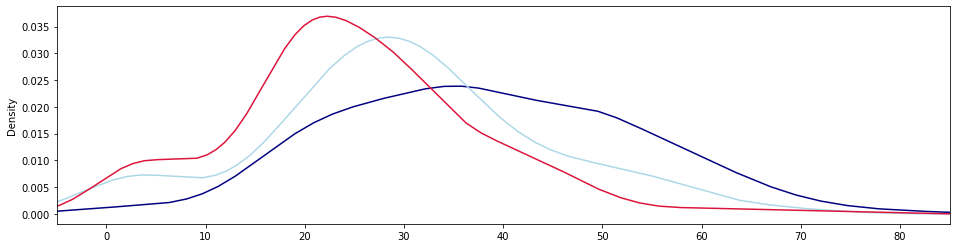

In [15]:
# But this is actually easier to read using a Kernel Density Estimate (KDE). Note the use of 'xlim'.
df[df['Pclass']==1]['Age'].plot(kind='density', xlim=(-5, 85), figsize=(16,4), color='navy')
df[df['Pclass']==2]['Age'].plot(kind='density', xlim=(-5, 85), figsize=(16,4), color='lightblue')
df[df['Pclass']==3]['Age'].plot(kind='density', xlim=(-5, 85), figsize=(16,4), color='crimson');

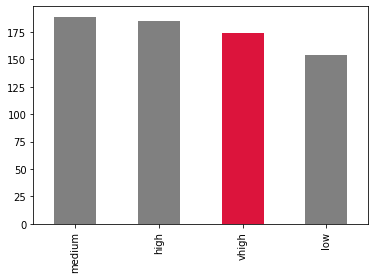

In [16]:
# Bar chart. Use colors to make a particular value 'pop'!
df['fare_groups'].value_counts().plot(kind='bar', color=['gray', 'gray', 'crimson', 'gray']);

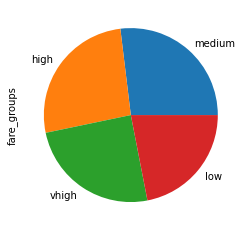

In [17]:
# Pie chart
df['fare_groups'].value_counts().plot(kind='pie', figsize=(4,4));

In [19]:
# Compare two categorical variables using crosstab
cab_death = pd.crosstab(df['cabin_class'],df['Survived'])
cab_death

Survived,0,1
cabin_class,,
first,64,120
second,90,83
third,270,85


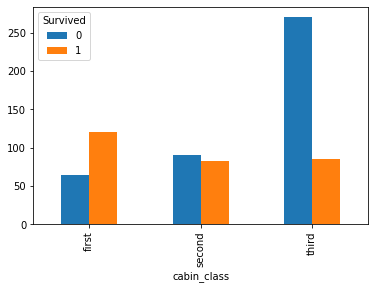

In [20]:
# Make that into a bar chart.
cab_death.plot(kind='bar');

In [21]:
# Crosstab with column percents.
cab_death1 = pd.crosstab(df['cabin_class'],df['Survived'], normalize='columns')
cab_death1

Survived,0,1
cabin_class,,
first,0.150943,0.416667
second,0.212264,0.288194
third,0.636792,0.295139


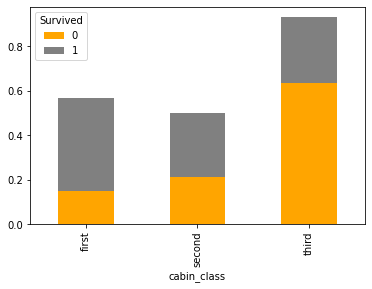

In [22]:
# make a stacked bar chart, for easy comparison of two categorical variables.
cab_death1.plot(kind='bar', stacked=True, color=['orange', 'gray']);

In [23]:
# Crosstab with column percents.
cab_death2 = pd.crosstab(df['cabin_class'],df['Survived'], normalize='index')
cab_death2

Survived,0,1
cabin_class,,
first,0.347826,0.652174
second,0.520231,0.479769
third,0.760563,0.239437


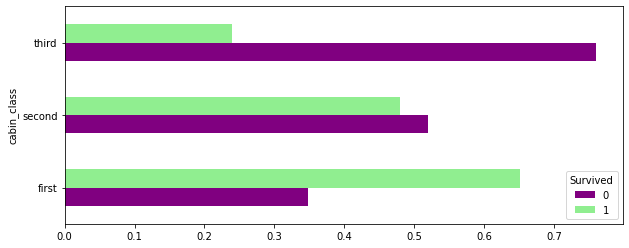

In [24]:
# A paired barchart for comparison of two categorical variables. Note the use of 'barh'.
cab_death2.plot(kind='barh', color=['purple', 'lightgreen'], figsize=(10,4));

In [25]:
# Let's look at a single continuous variable
df['Age'].mean()

29.64209269662921

In [26]:
# Now explore that continuous variable broken out by a categorical (i.e., categorical) variable.
cab_age = df.groupby('cabin_class')['Age'].mean()
cab_age

cabin_class
first     38.105543
second    29.877630
third     25.140620
Name: Age, dtype: float64

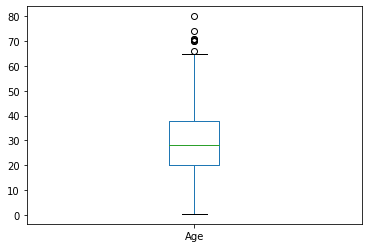

In [27]:
# To visualize a single continuous variable, you can just use `.plot` with `kind=box`
df['Age'].plot(kind='box');

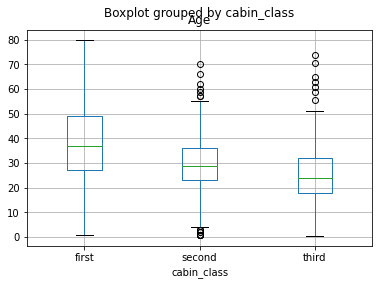

In [28]:
# But to break out a continuous variable by a categorical variable, use `.boxplot`
df.boxplot(column='Age', by='cabin_class');

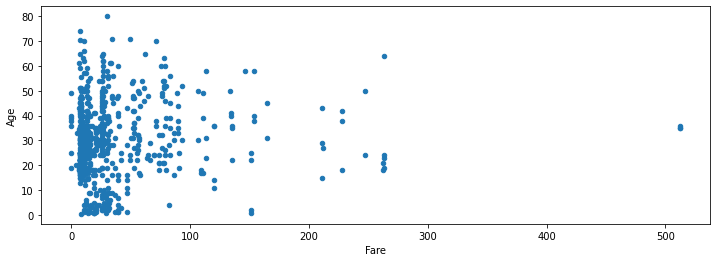

In [29]:
# Two continuous variables: age by fare
df.plot(kind = 'scatter', x='Fare', y='Age', figsize=(12,4));

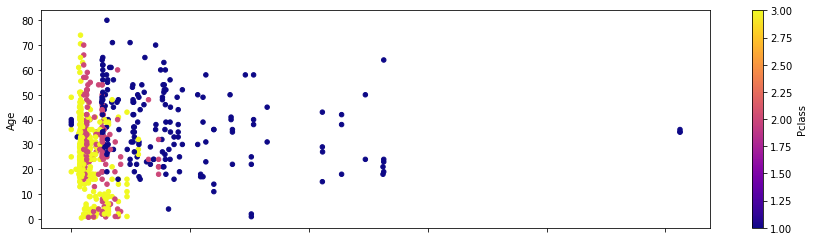

In [30]:
# Three variables: age, fare, and cabin class (color can be either continuous or categorical here).
df.plot(kind = 'scatter', x='Fare', y='Age', c='Pclass', colormap='plasma', figsize=(15,4));

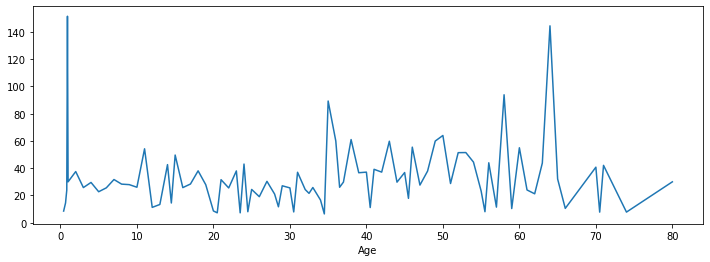

In [31]:
# line chart: age by fare
df.groupby('Age')['Fare'].mean().plot(figsize=(12,4));

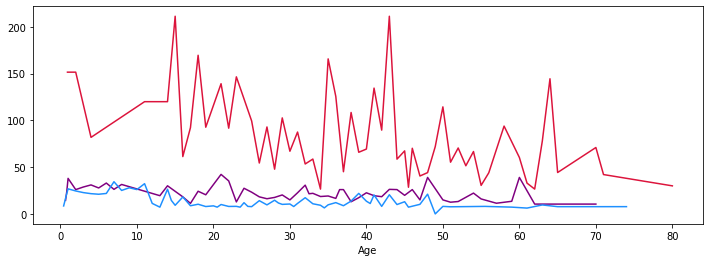

In [33]:
# Line chart: age by fare and cabin class
mycolors=['crimson', 'purple', 'dodgerblue']
# Rather than specifying 3 plots (as we did above, with the histogram) you can just loop through the values.
for x in [1,2,3]:
    df[df['Pclass']==x].groupby('Age')['Fare'].mean().plot(figsize=(12,4), color=mycolors[x-1])

In [35]:
import numpy as np
x=np.linspace(0,5,11)
y=x**2

In [36]:
x

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [37]:
y

array([ 0.  ,  0.25,  1.  ,  2.25,  4.  ,  6.25,  9.  , 12.25, 16.  ,
       20.25, 25.  ])

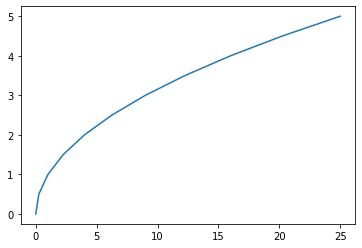

In [39]:
plt.plot(y,x);

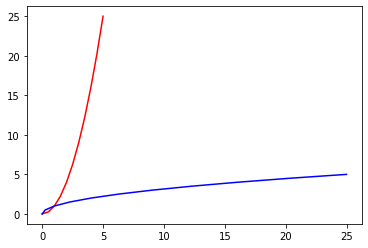

In [40]:
plt.plot(x,y,'r')
plt.plot(y,x,'b');

In [59]:
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2014/04/enten-early-approval-prediction.png?w=1150'
example = Image(url=url, width=500)

display(example)

In [48]:
#Styles available in matplotlib?
print(plt.style.available[:5])
plt.style.use('fivethirtyeight')

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background']


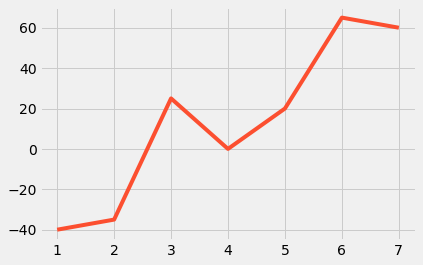

In [62]:
#create fake data to replicate
fake = pd.Series([-40, -35, 25, 0, 20, 65, 60],
                 index=range(1,8))

fake.plot.line(color='C1');

# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [ ]:
# More Work Here